<a href="https://colab.research.google.com/github/ChuquEmeka/K-Means-Clustering/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using K-Means Clustering to find teen market segments.

### Presented by Edeh Emeka N.

**This exercise aims at helping businesses target the correct segment of the population using teens as a case study.**

In [9]:
sns_data<-read.csv("snsdata.csv")
#This dataset represents a random sample of 30,000 U.S High School Students who had profiles on 
#SNS in 2006. The real identities of the students are not revealed.

In [10]:
str(sns_data)

'data.frame':	30000 obs. of  40 variables:
 $ gradyear    : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ gender      : chr  "M" "F" "M" "F" ...
 $ age         : num  19 18.8 18.3 18.9 19 ...
 $ friends     : int  7 0 69 0 10 142 72 17 52 39 ...
 $ basketball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ football    : int  0 1 1 0 0 0 0 0 0 0 ...
 $ soccer      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ softball    : int  0 0 0 0 0 0 0 1 0 0 ...
 $ volleyball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ swimming    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cheerleading: int  0 0 0 0 0 0 0 0 0 0 ...
 $ baseball    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ tennis      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sports      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cute        : int  0 1 0 1 0 0 0 0 0 1 ...
 $ sex         : int  0 0 0 0 1 1 0 2 0 0 ...
 $ sexy        : int  0 0 0 0 0 0 0 1 0 0 ...
 $ hot         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ kissed      : int  0 0 0 0 5 0 0 0 0 0 ...
 $ dance       : int  1 0 0 0 1 0 0 0 0 0 ...
 $

In [11]:
#i will determine the number of missing values in each of the columns
 sapply(sns_data, function(x) sum(is.na (x)))

gradyear       gender          age      friends   basketball     football 
           0         2724         5086            0            0            0 
      soccer     softball   volleyball     swimming cheerleading     baseball 
           0            0            0            0            0            0 
      tennis       sports         cute          sex         sexy          hot 
           0            0            0            0            0            0 
      kissed        dance         band     marching        music         rock 
           0            0            0            0            0            0 
         god       church        jesus        bible         hair        dress 
           0            0            0            0            0            0 
      blonde         mall     shopping      clothes    hollister  abercrombie 
           0            0            0            0            0            0 
         die        death        drunk        drugs 
           0            0            0            0

**From the above output, the gender column has 2724 missing values, age column has 5086 missing values and the rest columns have no missing values.**

In [12]:
table(sns_data$gender, useNA ="ifany")


    F     M  <NA> 
22054  5222  2724 

In [13]:
#I will check for outliers in the age variable
summary(sns_data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.086  16.312  17.287  17.994  18.259 106.927    5086 

**I will drop ages that fall outside the range of 13 and 20 years**

In [14]:
sns_data$age<-ifelse(sns_data$age>=13 & sns_data$age < 20, sns_data$age, NA)

In [15]:
summary(sns_data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.03   16.30   17.27   17.25   18.22   20.00    5523 

**Now the ages fall within an ideal High School teenager Age**

In [16]:
#creating dummy variables for females and unknown
sns_data$female<-ifelse(sns_data$gender=="F" & !is.na(sns_data$gender),1,0)
sns_data$no_gender<-ifelse(is.na(sns_data$gender),1,0)

In [17]:
no_gender<-table(sns_data$no_gender, useNA="ifany")

In [18]:
no_gender


    0     1 
27276  2724 

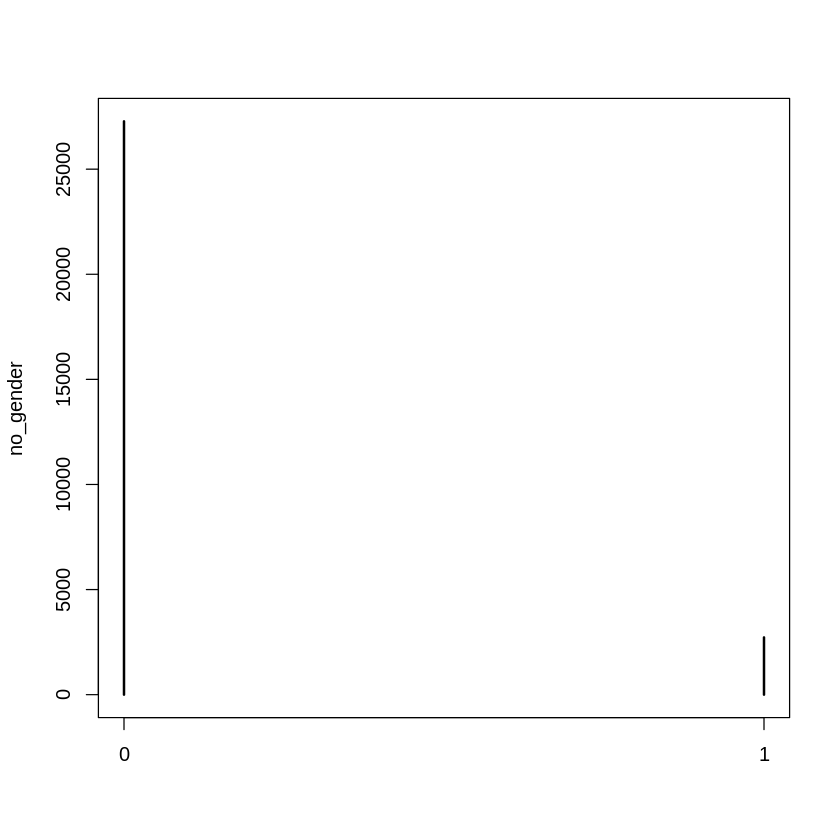

In [19]:
plot(no_gender)

In [20]:
table(sns_data$female, useNA="ifany")


    0     1 
 7946 22054 

In [21]:
#determining the average age for each graduating year
avg_age<- ave(sns_data$age, sns_data$gradyear, FUN = function(x) mean(x, na.rm = TRUE))

In [22]:
#replacing the age missing values with the average age of each graduating year
replace_missing_value<-ifelse(is.na(sns_data$age),avg_age, sns_data$age)

In [23]:
summary(replace_missing_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.03   16.28   17.24   17.24   18.21   20.00 

In [24]:
#replace_missing_value

# **Model Training**

In [25]:
interest<-sns_data[5:40] #A dataframe considering only the 36 features that represent the 
#number of times the various interests appera on the teens SNS profile.

In [26]:
#applying z-score to standerdize the dataframe
interest_zs<-as.data.frame(lapply(interest, scale))

In [27]:
#using set.seed to initialize random number generator to a specific sequence
set.seed(2468)

In [28]:
#i will use kmeans(), from the stats package, over the dataframe to divide the teenagers' interest
#data into five clusters
teen_clusters<- kmeans(interest_zs, 5)

In [29]:
teen_clusters$size

[1]   868  2518 20541   986  5087

In [30]:
teen_clusters$centers

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,0.14167017,0.22213753,0.10379744,0.02815663,0.16699415,0.2392009,0.39745979,0.01969240,0.13637546,0.09662301,⋯,0.06176156,0.60870187,0.79614983,0.57306801,4.14729831,3.9833955,0.04833458,0.09981960,0.03938611,0.03849076
2,1.41139990,1.25990865,0.47154728,1.17959841,1.10315092,0.1056866,0.09999096,1.21014720,0.11607423,1.09305795,⋯,0.04393711,0.01195874,0.03845691,0.01602965,-0.09038606,-0.1091567,-0.07285312,-0.03240395,-0.06815955,-0.09099888
3,-0.18471786,-0.18845642,-0.08040292,-0.13447193,-0.13077930,-0.1080758,-0.10670753,-0.13851514,-0.04453516,-0.15243746,⋯,-0.02917974,-0.19057189,-0.24173679,-0.19615172,-0.15598772,-0.1485480,-0.10029465,-0.09490037,-0.09110576,-0.11445965
4,0.34332617,0.36267270,0.11427889,0.13033068,0.08696035,0.2598940,0.16930409,0.22070549,0.11749380,0.77073031,⋯,0.36574690,0.61694756,0.26313226,1.20933731,0.16410482,0.2595749,1.75304512,0.93425619,1.89121987,2.85135813
5,-0.04346466,0.02913756,0.05139085,-0.07096261,-0.06331635,0.2929004,0.28074961,-0.08583049,0.07633162,-0.09139197,⋯,0.01464754,0.54015363,0.77023285,0.45192850,-0.06485679,-0.0761444,0.09300957,0.20112474,0.02832696,-0.05201458


# **Improving model performance**

In [31]:
#applying the cluster into the full dataset
sns_data$cluster<- teen_clusters$cluster

In [32]:
#The personal information of the first 10 teens in the SNS data and their cluster assignments
sns_data[1:10, c("cluster", "gender", "age","friends")]

,cluster,gender,age,friends
,<int>,<chr>,<dbl>,<int>
1,3,M,18.982,7
2,5,F,18.801,0
3,3,M,18.335,69
4,3,F,18.875,0
5,4,NA,18.995,10
6,5,F,NA,142
7,1,F,18.930,72
8,3,M,18.322,17
9,3,F,19.055,52


In [33]:
#Getting the average of the 5 clusters
aggregate(data = sns_data, age~cluster, mean)

cluster,age
<int>,<dbl>
1,16.90690
2,17.07023
3,17.31210
4,17.14594
5,17.19468


In [34]:
#Getting the proportion of females in the five cluster
aggregate(data = sns_data, female~cluster, sum)

cluster,female
<int>,<dbl>
1,726
2,1744
3,14395
4,789
5,4400


In [35]:
#Getting the average number of users' friends of the five clusters
aggregate(data = sns_data, friends~cluster, mean)

cluster,friends
<int>,<dbl>
1,41.27419
2,35.47776
3,27.54394
4,30.65619
5,36.21349
